## Preprocessing

In [2]:
# Module 21 Deep Learning Challenge
# Vincent Passanisi
# UCI Data Analytics Bootcamp
# Assignment due March 20, 2023

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
application_df.shape

(34299, 12)

In [4]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [5]:
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df.drop(columns=['EIN', 'NAME', 'STATUS', 'USE_CASE', 'AFFILIATION', 'SPECIAL_CONSIDERATIONS'], inplace=True)
application_df

,APPLICATION_TYPE,CLASSIFICATION,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,C1000,Association,0,5000,1
1,T3,C2000,Co-operative,1-9999,108590,1
2,T5,C3000,Association,0,5000,0
3,T3,C2000,Trust,10000-24999,6692,1
4,T3,C1000,Trust,100000-499999,142590,1
...,...,...,...,...,...,...
34294,T4,C1000,Association,0,5000,0
34295,T4,C3000,Association,0,5000,0
34296,T3,C2000,Association,0,5000,0
34297,T5,C3000,Association,0,5000,1


In [7]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   APPLICATION_TYPE  34299 non-null  object
 1   CLASSIFICATION    34299 non-null  object
 2   ORGANIZATION      34299 non-null  object
 3   INCOME_AMT        34299 non-null  object
 4   ASK_AMT           34299 non-null  int64 
 5   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.6+ MB


In [21]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
counts = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = counts.loc[counts < 700].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [22]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [23]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
class_counts = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = class_counts.loc[class_counts > 1]
classifications_to_replace

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [24]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = class_counts.loc[class_counts < 1000].index
classifications_to_replace

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [25]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [26]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
counts = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = counts.loc[counts < 700].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [27]:
ask = application_df.loc[(application_df['ASK_AMT'] > 10000) & (application_df['ASK_AMT'] < 190000)]

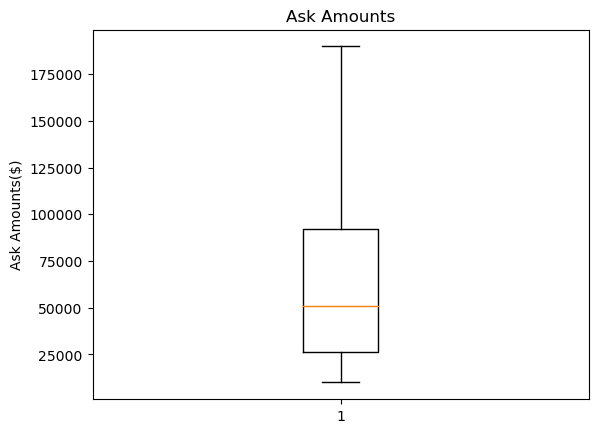

In [28]:
fig1, ax1 = plt.subplots()
ax1.set_title('Ask Amounts')
ax1.set_ylabel('Ask Amounts($)')
ax1.boxplot(ask['ASK_AMT'])
plt.show()

In [29]:
ask.shape

(4873, 6)

In [30]:
# Establish the bins.
size_bins = [0, 5000, 10000, 50000, 100000, 150000, 200000]
labels = ["(<5k)", "(5k-10k)", "(10k-50k)", "(50k-100k)", "(100k to 150k)", "(>150k)"]

In [31]:
# Create new Dataframe
ask_df = pd.DataFrame(ask)

In [32]:
# Categorize the spending based on the bins
# Use `pd.cut` on the ASK_AMT column of the DataFrame.

ask_df['ASK_BINS'] = pd.cut(ask_df['ASK_AMT'], size_bins, labels=labels)

In [33]:
# Drop the original ASK_AMT column
ask_clean_df = ask_df.drop(columns='ASK_AMT')

In [34]:
ask_clean_df.head()

,APPLICATION_TYPE,CLASSIFICATION,ORGANIZATION,INCOME_AMT,IS_SUCCESSFUL,ASK_BINS
1,T3,C2000,Co-operative,1-9999,1,(100k to 150k)
4,T3,C1000,Trust,100000-499999,1,(100k to 150k)
6,T3,C1000,Trust,100000-499999,1,(10k-50k)
8,T7,C1000,Trust,1-9999,1,(50k-100k)
10,T3,C1200,Trust,25000-99999,0,(50k-100k)


In [35]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
application_df_dummies = pd.get_dummies(ask_clean_df)
application_df_dummies.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,CLASSIFICATION_C1000,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_5M-10M,ASK_BINS_(<5k),ASK_BINS_(5k-10k),ASK_BINS_(10k-50k),ASK_BINS_(50k-100k),ASK_BINS_(100k to 150k),ASK_BINS_(>150k)
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
6,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
10,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [36]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df_dummies['IS_SUCCESSFUL']
X = application_df_dummies.drop(columns=['IS_SUCCESSFUL'], inplace=False)

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=1)
X.shape

(4873, 32)

In [37]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [38]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=32))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [39]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [40]:
 # Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 11s]
val_accuracy: 0.6302831172943115

Best val_accuracy So Far: 0.6401312947273254
Total elapsed time: 00h 02m 49s
INFO:tensorflow:Oracle triggered exit


In [41]:
 # Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 5,
 'num_layers': 6,
 'units_0': 7,
 'units_1': 7,
 'units_2': 5,
 'units_3': 7,
 'units_4': 7,
 'units_5': 3,
 'tuner/epochs': 7,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

In [42]:
 # Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

77/77 - 0s - loss: 0.6514 - accuracy: 0.6401 - 151ms/epoch - 2ms/step
Loss: 0.6514246463775635, Accuracy: 0.6401312947273254


In [43]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
print("The model is saved to HDF5 format")
best_model.save('AlphabetSoupCharity_Optimization_2.h5')
print("The same model is recreated with same weights and optimizer")
new_nn = tf.keras.models.load_model('AlphabetSoupCharity_Optimization_2.h5')
print("The architecture of the model is observed")
new_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 165       
                                                                 
 dense_1 (Dense)             (None, 7)                 42        
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 5)                 40        
                                                                 
 dense_4 (Dense)             (None, 7)                 42        
                                                                 
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 3)                 2